<a href="https://colab.research.google.com/github/markf94/SDSS2020_quantum_workshop/blob/master/solutions/solutions_tutorial1_quantum_bits_and_gates_SDSS2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tutorial 1: Quantum bits & gates with Quil and PyQuil

In this 30min tutorial, you will learn:
* _How to initialize and manipulate a qubit_
* _How to construct, run and measure simple quantum circuits using the Quil language_
* _What the X, MEASURE, H and CNOT operations do_

This tutorial is all about [Quil](https://github.com/rigetti/quil) which is the quantum instruction language used by [Rigetti](https://www.rigetti.com/).

First, we need to retrieve the IP address of this Google Colab notebook such that we can authenticate it with the quantum simulator & compiler backend. **PLEASE, send this IP address to your instructor (Mark) such that he can whitelist this IP on the server.**

In [1]:
!curl ifconfig.me

104.154.45.47

Next, we need to make sure that the `pyquil` library is installed.

In [2]:
%matplotlib inline
!pip install pyquil matplotlib

     |████████████████████████████████| 215kB 3.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 71kB 5.6MB/s 
     |████████████████████████████████| 51kB 4.9MB/s 
     |████████████████████████████████| 112kB 10.4MB/s 
     |████████████████████████████████| 256kB 8.8MB/s 
     |████████████████████████████████| 1.4MB 15.2MB/s 
     |████████████████████████████████| 112kB 25.7MB/s 
     |████████████████████████████████| 552kB 29.6MB/s 
  Created wheel for pyquil: filename=pyquil-2.19.0-cp36-none-any.whl size=243391 sha256=ca945dd25efc19c02046857bb9b2bb1c85556887818bb49a87e6db952ac094b0
  Stored in directory: /root/.cache/pip/wheels/46/44/ef/f9948288424a5d2e76f0260b64fd7cca6ea1bdbdfbe6c111b6
Successfully built pyquil
  Created wheel for rpcq: filename=rpcq-3.3.0-cp36-none-any.whl size=45376 sha256=c3647e5d522710d406e4315b4406e37993a8b8a49be33e0ff74cc45d55afa5f4

Don't worry about these two next functions for now. They are making your life a bit easier. You can revisit and study them later.

In [0]:
from pyquil import get_qc, Program
from pyquil.api import ForestConnection, WavefunctionSimulator

# establishing connection to the simulator backend
simulator_ip = '34.224.6.31'
connection = ForestConnection(sync_endpoint=f'http://{simulator_ip}:5000', compiler_endpoint=f'tcp://{simulator_ip}:5555')
simulator = WavefunctionSimulator(connection=connection)
qvm = get_qc('5q-qvm', connection=connection)

def execute(quil_program, trials=100, silent=False, raw=False):
    """
    Thin function that takes a low-level Quil program and returns the
    resulting probability distribution.
    """

    results = [tuple(qvm.run(Program(quil_program))[0]) for _ in range(trials)]

    if not silent:
        observed_results = set(results)
        for result in sorted(observed_results):
            bitstring = ''.join(reversed(list(map(str, result))))
            print(f'|{bitstring}> state: {results.count(result)/len(results)} [{results.count(result)}/{len(results)}]')
        if raw:
            print(f'Results: {results}')

def plot(quil_program):
    return simulator.wavefunction(Program(quil_program)).plot()    

# Qubit

The carrier of information in the quantum computing circuits is the qubit, usually denoted in the Dirac notation as

$$
\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}
$$

$$ \ket{\psi} = \alpha \ket{0}  + \beta \ket{1} $$ 

where

$$ \alpha,\beta \in \mathbb{C} $$

and

$$
\ket{0} = \begin{bmatrix}
    0 \\
    1 \\
\end{bmatrix}, \,\,\, \ket{1} = \begin{bmatrix}
    1 \\
    0 \\
\end{bmatrix}
$$


# Quantum gates and measurement

Quantum circuits are composed of two fundamental building blocks - quantum gates and the measurement operation. Here we introduce the first two single qubit operations:

## X gate

X gate serves like a quantum version of the NOT operator - it flips probability coefficients between the |0> and |1> state of the qubit it is applied to.

$$
X = 
\begin{bmatrix}
    0 & 1 \\
    1 & 0 \\
\end{bmatrix}
$$

In a circuit diagram we draw:

<img src=https://upload.wikimedia.org/wikipedia/commons/4/43/Qcircuit_X.svg width="200">

In the Quil language, we implement X as:

```
X <qubit>
```

The statement above applies X gate to qubit `<qubit>` i.e.

```
X 2
```

applies the X gate on qubit 2.


## Measurement operation

To read out the state of the qubit, we *measure* it, which forces it to collapse to one of its basis states.

In a circuit diagram we draw:

<img src="https://upload.wikimedia.org/wikipedia/commons/a/a7/Quantum_circuit_measurement_symbol.png" width="150">

To measure a qubit in Quil, we use a `MEASURE` operation with the following syntax:

```
MEASURE <qubit> ro[<bit>]
```

where `<qubit>` is the qubit number, `ro` is the name of the classical register (readout) and `<bit>` is the index of the classical register to store the measurement result in.

However, before you can write to a classical `ro` you have to initialize it! In Quil, this usually happens at the **very top of the file**:

```
DECLARE ro BIT[<num_bits>]
```

where `num_bits` is the number of classical bits we want in that classical register `ro`.

#### Exercise 1.1

Qubits in the circuits are always initialized to the same state. Conduct an experiment to figure out what the initial state of the qubits in the simulator is.

In [4]:
execute("""
DECLARE ro BIT[1]
MEASURE 0 ro[0]
""")

|0> state: 1.0 [100/100]


#### Exercise 1.2

Create a quantum circuit that always produces state $\ket{01}$.

In [5]:
execute("""
DECLARE ro BIT[2]
X 0
MEASURE 0 ro[0]
MEASURE 1 ro[1]
""")

|01> state: 1.0 [100/100]


**Hint:**

In quantum computing we count qubits from right to left. This means a quantum state with three qubits is written down like this:

$$\ket{q_2,q_1,q_o}$$

If you're curious why this is the case you can check out [bonus exercise X2](https://colab.research.google.com/drive/1_LwrzKKgxliYmp6RICc6a9jG4AFt7BcW?authuser=1#scrollTo=mBD5Gc4ghmfW&line=1&uniqifier=1) if you have time at the end of this tutorial.

## H gate

H gate is often used to put basis states into uniform superposition:

$$
H = \frac{1}{\sqrt{2}}
\begin{bmatrix}
    1 & 1 \\
    -1 & 1 \\
\end{bmatrix}
$$

A uniform superposition is a quantum state with equal probability for all bitstrings e.g.

$$|\psi> = \frac{1}{\sqrt{2}} \ket{0} + \frac{1}{\sqrt{2}} \ket{1}$$

Similiar to X gate (or any single qubit gate, really), we implement H as:

```
H <qubit>
```

#### Exercise 1.3

Figure out what is the problem with the following circuit and implement a fix.

In [6]:
execute("""
DECLARE ro BIT[1]
H 0
MEASURE 0 ro[0]
""")

|0> state: 0.57 [57/100]
|1> state: 0.43 [43/100]


#### Exercise 1.4

Write a Quil program that creates a uniform superposition over all 2-bit strings:

$$|\psi> = \frac{1}{2} (\ket{00} + \ket{01} + \ket{10} + \ket{11})$$

In [7]:
execute("""
DECLARE ro BIT[2]
H 0
H 1
MEASURE 0 ro[0]
MEASURE 1 ro[1]
""")

|00> state: 0.21 [21/100]
|10> state: 0.2 [20/100]
|01> state: 0.33 [33/100]
|11> state: 0.26 [26/100]


#### Exercise 1.5

Plot a wavefunction of the program above. Why does it look different than the sample distribution? What program should we plot to mirror the sample distribution above?

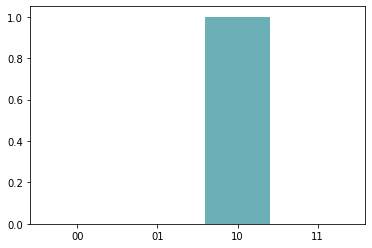

In [8]:
plot("""
DECLARE ro BIT[2]
H 0
H 1
MEASURE 0 ro[0]
MEASURE 1 ro[1]
""")

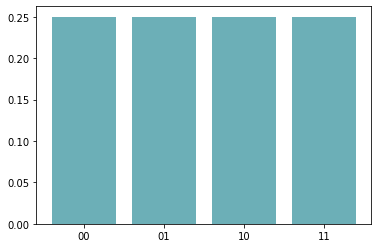

In [9]:
plot("""
H 0
H 1
""")

#### Exercise 1.6

Implement a fair quantum 8-sided dice.

In [10]:
execute("""
DECLARE ro BIT[3]
H 0
H 1
H 2
MEASURE 0 ro[0]
MEASURE 1 ro[1]
MEASURE 2 ro[2]
""", trials=1000)

|000> state: 0.13 [130/1000]
|100> state: 0.125 [125/1000]
|010> state: 0.125 [125/1000]
|110> state: 0.139 [139/1000]
|001> state: 0.133 [133/1000]
|101> state: 0.112 [112/1000]
|011> state: 0.11 [110/1000]
|111> state: 0.126 [126/1000]



## C-NOT gate

$CNOT$ gate is the first 2-qubit gate we encounter. This gate applies the NOT operation to the second qubit only if the first qubit (control) is $\ket{1}$.

$$
CNOT = 
\begin{bmatrix}
    1 & 0 & 0 & 0\\
    0 & 1 & 0 & 0\\
    0 & 0 & 0 & 1\\
    0 & 0 & 1 & 0\\
\end{bmatrix}
$$

In a circuit diagram we draw it as

<img src=https://i.stack.imgur.com/kHu5I.png width=150>

In the Quil language, we implement CNOT as:

```
CNOT <control_qubit> <qubit>
```

#### Exercise 1.7

Implement a circuit with two qubits and a CNOT gate. Test this circuit on initial states $\ket{00}$, $\ket{01}$, $\ket{10}$ and $\ket{11}$.

In [11]:
print('Initialized as |00>')
execute("""
DECLARE ro BIT[2]
CNOT 0 1
MEASURE 0 ro[0]
MEASURE 1 ro[1]
""")

Initialized as |00>
|00> state: 1.0 [100/100]


In [12]:
print('Initialized as |01>')
execute("""
DECLARE ro BIT[2]
X 0
CNOT 0 1
MEASURE 0 ro[0]
MEASURE 1 ro[1]
""")

Initialized as |01>
|11> state: 1.0 [100/100]


In [13]:
print('Initialized as |10>')
execute("""
DECLARE ro BIT[2]
X 1
CNOT 0 1
MEASURE 0 ro[0]
MEASURE 1 ro[1]
""")

Initialized as |10>
|10> state: 1.0 [100/100]


In [14]:
print('Initialized as |11>')
execute("""
DECLARE ro BIT[2]
X 0
X 1
CNOT 0 1
MEASURE 0 ro[0]
MEASURE 1 ro[1]
""")

Initialized as |11>
|01> state: 1.0 [100/100]


#### Exercise 1.8

Write a program that constructs the following entangled pair of qubits:

$$|\psi> = \frac{1}{\sqrt{2}} \ket{00} + \frac{1}{\sqrt{2}} \ket{11}$$


An entangled pair of qubits always collapses to the same basis state when measured. For example, if you measure qubit 0 in the `0` state then you immediately know that qubit 1 must be in the `0` state too!

In [15]:
execute("""
DECLARE ro BIT[2]
H 0
CNOT 0 1
MEASURE 0 ro[0]
MEASURE 1 ro[1]
""")

|00> state: 0.5 [50/100]
|11> state: 0.5 [50/100]


## Bonus exercises

#### Bonus Exercise X1:

Check out the [documentation page about Quil gates and instructions](http://docs.rigetti.com/en/stable/apidocs/gates.html). Build simple circuits and vary their inputs (flip some qubits at the beginning) to try and understand the following gates:

`Y`, `CCNOT` and `SWAP`

#### Bonus Exercise X2:
Read the paper with the title ['Someone shouts, “$\ket{01000}$!” Who is excited?'](https://arxiv.org/pdf/1711.02086.pdf) by Rigetti staff member Robert Smith to gain a deeper understanding why we label qubits the reverse way ($\ket{q_N, ..., q_1, q_0}$ rather than $\ket{q_0, ..., q_{N-1}, q_N}$).